In [22]:
import pandas as pd

# CSV 파일 읽기
df_solar = pd.read_csv('df_merged_solar_final.csv')

In [23]:
# 데이터 요약
print("✅ 데이터 기본 정보")
print(df_solar.info())

# 결측치 확인
print("\n✅ 컬럼별 결측치 수")
print(df_solar.isnull().sum())

# 기본 통계
print("\n✅ 수치형 컬럼 기술 통계")
print(df_solar.describe())


✅ 데이터 기본 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196890 entries, 0 to 196889
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   일자         196890 non-null  object 
 1   발전구분       196890 non-null  object 
 2   설비용량(MW)   196890 non-null  float64
 3   시간         196890 non-null  int64  
 4   발전량(kWh)   196827 non-null  float64
 5   연식(년)      196890 non-null  float64
 6   지점명        196890 non-null  object 
 7   기온(°C)     196867 non-null  float64
 8   강수량(mm)    196889 non-null  float64
 9   풍속(m/s)    196856 non-null  float64
 10  풍향(16방위)   196856 non-null  float64
 11  습도(%)      196845 non-null  float64
 12  일사(MJ/m2)  196889 non-null  float64
 13  적설(cm)     196889 non-null  float64
 14  하늘상태       187736 non-null  float64
 15  태양고도       196890 non-null  float64
 16  방위각        99467 non-null   float64
dtypes: float64(13), int64(1), object(3)
memory usage: 25.5+ MB
None

✅ 컬럼별 결측치 수
일자              

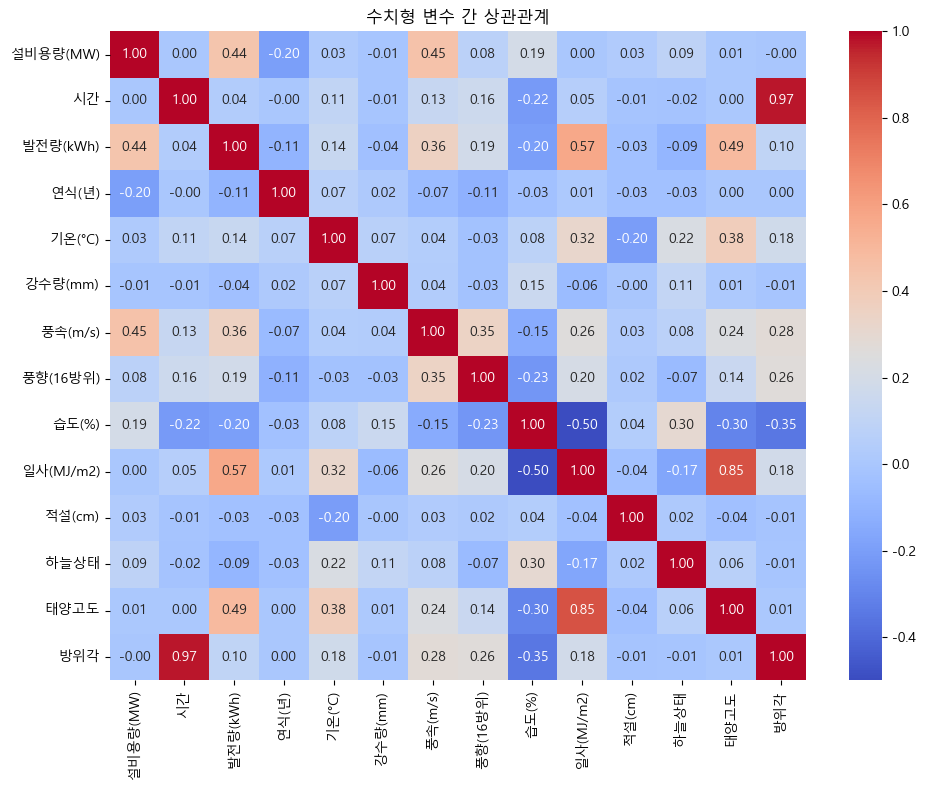

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import platform

# ✅ 한글 폰트 설정 (운영체제별 자동 감지)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # 윈도우용
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')    # 맥용
else:
    plt.rc('font', family='NanumGothic')    # 리눅스용 (NanumGothic 설치 필요)

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

plt.figure(figsize=(10, 8))
sns.heatmap(df_solar.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('수치형 변수 간 상관관계')
plt.tight_layout()
plt.savefig("df_solar_상관관계_히트맵.png", dpi=300)  # 🔽 저장
plt.show()


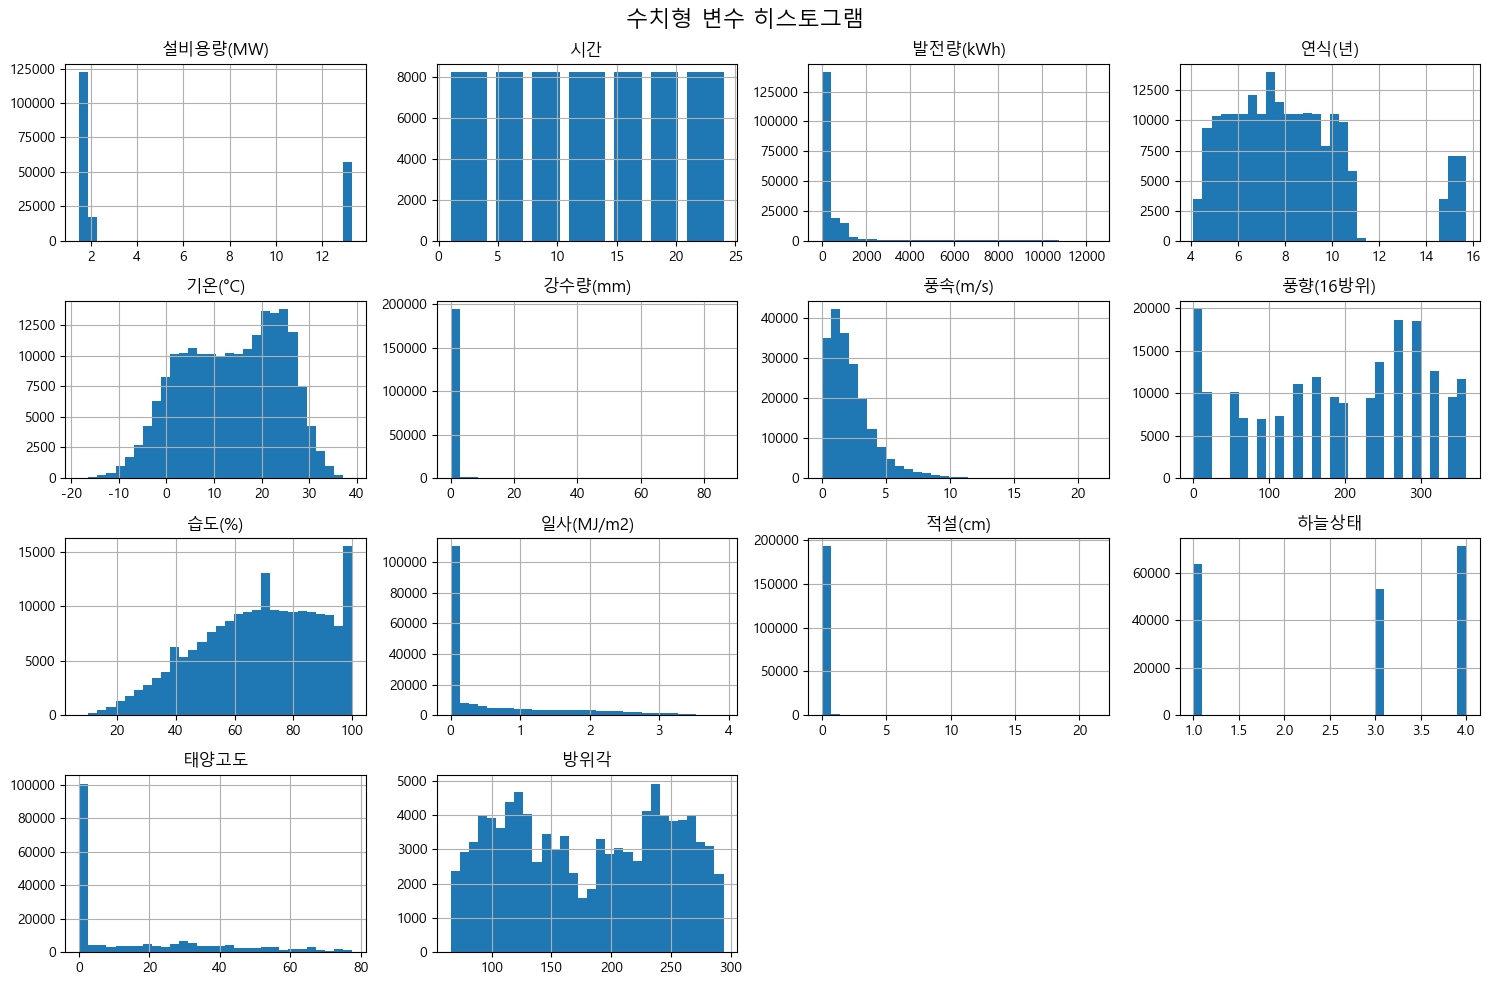

In [25]:
import matplotlib.pyplot as plt

# 1. 수치형 컬럼 자동 탐색
num_cols = df_solar.select_dtypes(include=['float64', 'int64']).columns

# 2. 히스토그램 그리고 figure 저장
fig = df_solar[num_cols].hist(bins=30, figsize=(15, 10))  # ← fig는 Axes 객체 배열
plt.suptitle("수치형 변수 히스토그램", fontsize=16)
plt.tight_layout()
plt.savefig("df_solar_히스토그램.png", dpi=300)
plt.show()


In [ ]:
def summarize_unique_values_full(df, threshold=50):
    print("✅ 컬럼별 유니크 값 및 개수 요약\n")
    
    for col in df.columns:
        unique_vals = df[col].dropna().unique()
        nunique = len(unique_vals)
        
        print(f"\n🔹 {col} ({df[col].dtype}) → 고유값 {nunique}개")

        if nunique > threshold:
            print("   ⮑ 연속형 데이터로 판단됨 (고유값 50개 초과)\n")
        else:
            value_counts = df[col].value_counts(dropna=True)
            for val, count in value_counts.items():
                print(f"   • {val} : {count}개")

# 실행
summarize_unique_values_full(df_solar)


NameError: name 'df_updated' is not defined

In [27]:
# 1. 삼랑진 발전소만 필터링
samrangjin = df_solar[df_solar['발전구분'] == '(군산)삼랑진태양광'].copy()

# 2. 일자, 시간 조합으로 중복 여부 확인
duplicated_rows = samrangjin.duplicated(subset=['일자', '시간'], keep=False)

# 3. 중복된 행만 추출
duplicated_data = samrangjin[duplicated_rows]

# 4. 중복 횟수 집계 (일자-시간 기준)
dupe_counts = samrangjin.groupby(['일자', '시간']).size().reset_index(name='count')
dupe_counts = dupe_counts[dupe_counts['count'] > 1].sort_values('count', ascending=False)

# 결과 출력
print(f"총 데이터 수: {len(samrangjin)}")
print(f"일자-시간 중복 행 수: {duplicated_data.shape[0]}")
print(f"중복된 일자-시간 쌍 개수: {dupe_counts.shape[0]}")
print("\n중복 빈도가 높은 순:")
print(dupe_counts.head(10))


총 데이터 수: 17520
일자-시간 중복 행 수: 17520
중복된 일자-시간 쌍 개수: 8760

중복 빈도가 높은 순:
              일자  시간  count
0     2023-01-01   1      2
5842  2023-09-01  11      2
5836  2023-09-01   5      2
5837  2023-09-01   6      2
5838  2023-09-01   7      2
5839  2023-09-01   8      2
5840  2023-09-01   9      2
5841  2023-09-01  10      2
5843  2023-09-01  12      2
5885  2023-09-03   6      2


In [28]:
# 1. (군산)삼랑진태양광만 추출
samrangjin = df_solar[df_solar['발전구분'] == '(군산)삼랑진태양광'].copy()

# 2. 일자+시간 중복 그룹 추출
dupe_groups = samrangjin.groupby(['일자', '시간'])

# 3. 중복된 그룹 중 count > 1 인 것만 필터링
dupe_groups = dupe_groups.filter(lambda x: len(x) > 1)

# 4. 중복된 그룹 중에서 수치형 컬럼들이 모두 동일한지 확인
# 비교 대상 컬럼: 발전량, 일사량 등 수치형 컬럼
exclude_cols = ['발전구분', '일자', '시간']
compare_cols = [col for col in samrangjin.columns if col not in exclude_cols]

# 모든 값이 같은 그룹만 추출
def is_group_identical(group):
    return group[compare_cols].nunique().eq(1).all()

# 결과 판별
all_identical = dupe_groups.groupby(['일자', '시간']).apply(is_group_identical)
all_same = all_identical.all()

print(f"중복된 (일자+시간) 쌍 중 수치가 모두 동일한 그룹 수: {all_identical.sum()}")
print(f"중복된 쌍 중 하나라도 값이 다른 그룹 수: {(~all_identical).sum()}")

if all_same:
    print("\n✅ 모든 중복 행이 수치까지 완전히 동일합니다. 안전하게 중복 제거 가능!")
else:
    print("\n⚠️ 일부 중복된 (일자+시간) 행은 수치가 서로 다릅니다. 평균 등 처리 전략이 필요합니다.")


중복된 (일자+시간) 쌍 중 수치가 모두 동일한 그룹 수: 540
중복된 쌍 중 하나라도 값이 다른 그룹 수: 8220

⚠️ 일부 중복된 (일자+시간) 행은 수치가 서로 다릅니다. 평균 등 처리 전략이 필요합니다.


C:\Users\박경국\AppData\Local\Temp\ipykernel_48076\899301384.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_identical = dupe_groups.groupby(['일자', '시간']).apply(is_group_identical)


In [29]:
# 1. (군산)삼랑진태양광 필터링
samrangjin = df_solar[df_solar['발전구분'] == '(군산)삼랑진태양광'].copy()

# 2. 일자 + 시간 기준 정렬
samrangjin = samrangjin.sort_values(by=['일자', '시간']).reset_index(drop=True)

# 3. CSV로 저장
samrangjin.to_csv("삼랑진_정렬데이터.csv", index=False, encoding='utf-8-sig')

print("✅ '삼랑진_정렬데이터.csv' 파일이 생성되었습니다.")


✅ '삼랑진_정렬데이터.csv' 파일이 생성되었습니다.


In [30]:
from pprint import pprint

# 1. 삼랑진 필터링
samrangjin = df_solar[df_solar['발전구분'] == '(군산)삼랑진태양광'].copy()

# 2. 중복 그룹 추출
dupe_groups = samrangjin.groupby(['일자', '시간']).filter(lambda x: len(x) > 1)

# 3. 비교할 컬럼 (발전구분, 일자, 시간 제외)
exclude_cols = ['발전구분', '일자', '시간']
compare_cols = [col for col in samrangjin.columns if col not in exclude_cols]

# 4. 중복 그룹에서 수치가 다른 경우만 찾아서 차이 출력
differences = []

grouped = dupe_groups.groupby(['일자', '시간'])

for (date, hour), group in grouped:
    for col in compare_cols:
        if group[col].nunique() > 1:
            values = group[col].unique()
            differences.append({
                '일자': date,
                '시간': hour,
                '컬럼': col,
                '고유값': list(values)
            })

# 5. 출력
if not differences:
    print("✅ 모든 중복 행이 완전히 동일합니다. 안전하게 중복 제거 가능!")
else:
    print("⚠️ 다음 중복된 행들에서 값 차이가 존재합니다:\n")
    for d in differences:
        print(f"📌 [{d['일자']} {d['시간']}시] → 컬럼 '{d['컬럼']}' 값 차이: {d['고유값']}")


⚠️ 다음 중복된 행들에서 값 차이가 존재합니다:

📌 [2023-01-01 8시] → 컬럼 '발전량(kWh)' 값 차이: [1.08, 0.864]
📌 [2023-01-01 9시] → 컬럼 '발전량(kWh)' 값 차이: [148.68, 88.32]
📌 [2023-01-01 10시] → 컬럼 '발전량(kWh)' 값 차이: [493.92, 316.224]
📌 [2023-01-01 11시] → 컬럼 '발전량(kWh)' 값 차이: [875.16, 487.392]
📌 [2023-01-01 12시] → 컬럼 '발전량(kWh)' 값 차이: [1098.18, 577.728]
📌 [2023-01-01 13시] → 컬럼 '발전량(kWh)' 값 차이: [1010.34, 528.096]
📌 [2023-01-01 14시] → 컬럼 '발전량(kWh)' 값 차이: [1084.68, 570.528]
📌 [2023-01-01 15시] → 컬럼 '발전량(kWh)' 값 차이: [832.14, 456.576]
📌 [2023-01-01 16시] → 컬럼 '발전량(kWh)' 값 차이: [427.14, 257.28]
📌 [2023-01-01 17시] → 컬럼 '발전량(kWh)' 값 차이: [104.94, 67.392]
📌 [2023-01-01 18시] → 컬럼 '발전량(kWh)' 값 차이: [0.18, 0.672]
📌 [2023-01-02 8시] → 컬럼 '발전량(kWh)' 값 차이: [2.52, 2.208]
📌 [2023-01-02 9시] → 컬럼 '발전량(kWh)' 값 차이: [108.36, 63.84]
📌 [2023-01-02 10시] → 컬럼 '발전량(kWh)' 값 차이: [557.46, 367.488]
📌 [2023-01-02 11시] → 컬럼 '발전량(kWh)' 값 차이: [1091.34, 613.152]
📌 [2023-01-02 12시] → 컬럼 '발전량(kWh)' 값 차이: [1372.32, 718.176]
📌 [2023-01-02 13시] → 컬럼 '발전량(kWh)' 값 차이: [13

In [31]:
import pandas as pd

df = pd.read_csv('한국서부발전(주)_신재생에너지발전량_20231231.csv', encoding='cp949')

In [32]:
print(df.columns.tolist())


['날짜', '발전기명', '용량_메가와트', '01시', '02시', '03시', '04시', '05시', '06시', '07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시', '합계', '주소지']


In [33]:
def summarize_unique_values_full(df, threshold=50):
    print("✅ 컬럼별 유니크 값 및 개수 요약\n")
    
    for col in df.columns:
        unique_vals = df[col].dropna().unique()
        nunique = len(unique_vals)
        
        print(f"\n🔹 {col} ({df[col].dtype}) → 고유값 {nunique}개")

        if nunique > threshold:
            print("   ⮑ 연속형 데이터로 판단됨 (고유값 50개 초과)\n")
        else:
            value_counts = df[col].value_counts(dropna=True)
            for val, count in value_counts.items():
                print(f"   • {val} : {count}개")

# 실행
summarize_unique_values_full(df)

✅ 컬럼별 유니크 값 및 개수 요약


🔹 날짜 (object) → 고유값 365개
   ⮑ 연속형 데이터로 판단됨 (고유값 50개 초과)


🔹 발전기명 (object) → 고유값 5개
   • (군산)삼랑진태양광 : 730개
   • (군산)영암F1태양광 : 365개
   • 장흥풍력 : 365개
   • 화순풍력발전 : 365개
   • 태안#9,10 수상태양광 : 364개

🔹 용량_메가와트 (float64) → 고유값 5개
   • 2.0 : 730개
   • 13.296 : 365개
   • 18.0 : 365개
   • 16.0 : 365개
   • 1.836 : 364개

🔹 01시 (float64) → 고유값 608개
   ⮑ 연속형 데이터로 판단됨 (고유값 50개 초과)


🔹 02시 (float64) → 고유값 616개
   ⮑ 연속형 데이터로 판단됨 (고유값 50개 초과)


🔹 03시 (float64) → 고유값 602개
   ⮑ 연속형 데이터로 판단됨 (고유값 50개 초과)


🔹 04시 (float64) → 고유값 608개
   ⮑ 연속형 데이터로 판단됨 (고유값 50개 초과)


🔹 05시 (float64) → 고유값 625개
   ⮑ 연속형 데이터로 판단됨 (고유값 50개 초과)


🔹 06시 (float64) → 고유값 706개
   ⮑ 연속형 데이터로 판단됨 (고유값 50개 초과)


🔹 07시 (float64) → 고유값 1044개
   ⮑ 연속형 데이터로 판단됨 (고유값 50개 초과)


🔹 08시 (float64) → 고유값 1464개
   ⮑ 연속형 데이터로 판단됨 (고유값 50개 초과)


🔹 09시 (float64) → 고유값 1732개
   ⮑ 연속형 데이터로 판단됨 (고유값 50개 초과)


🔹 10시 (float64) → 고유값 1795개
   ⮑ 연속형 데이터로 판단됨 (고유값 50개 초과)


🔹 11시 (float64) → 고유값 1764개
   ⮑ 연속형 데이터로 판단됨 (고유값 50개 초과)


🔹 1

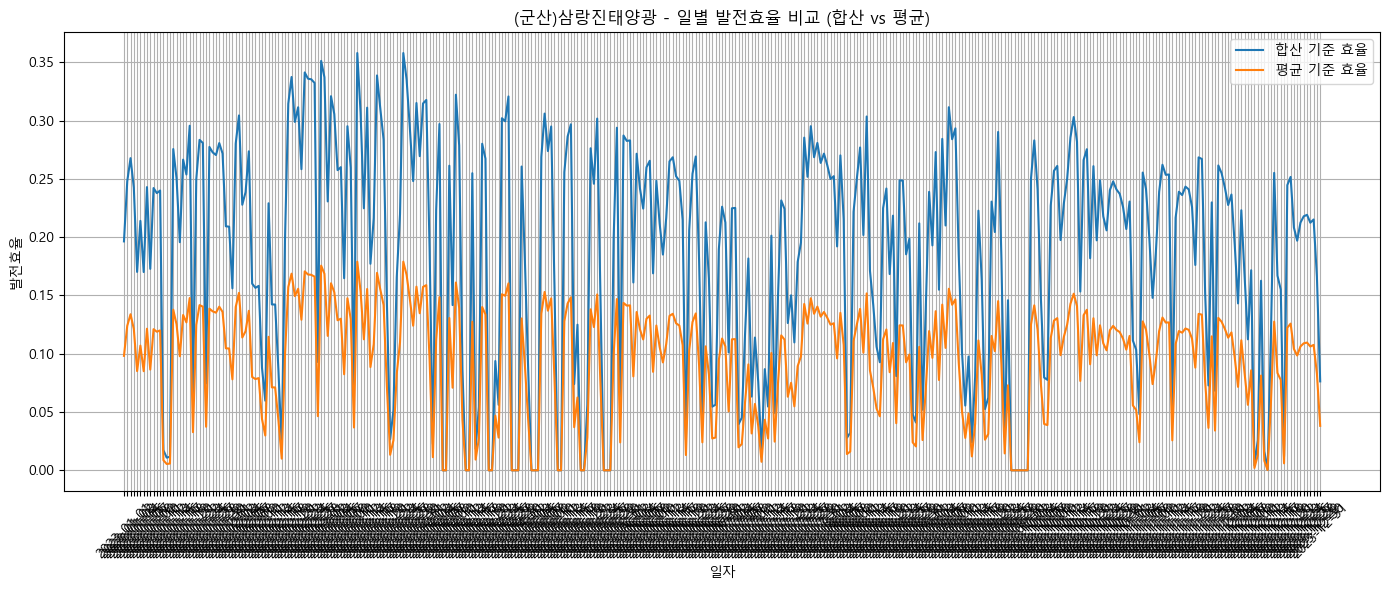

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False

# 1. (군산)삼랑진태양광 데이터만 추출
samrangjin = df_solar[df_solar['발전구분'] == '(군산)삼랑진태양광'].copy()

# 2. 일자+시간 기준으로 그룹핑하여 합산/평균 계산
grouped = samrangjin.groupby(['일자', '시간'], as_index=False)

# 3. 합산 기준
df_sum = grouped.agg({
    '발전량(kWh)': 'sum',
    '설비용량(MW)': 'mean'
})
df_sum['효율_합산기준'] = df_sum['발전량(kWh)'] / df_sum['설비용량(MW)'] / 1000

# 4. 평균 기준
df_mean = grouped.agg({
    '발전량(kWh)': 'mean',
    '설비용량(MW)': 'mean'
})
df_mean['효율_평균기준'] = df_mean['발전량(kWh)'] / df_mean['설비용량(MW)'] / 1000

# 5. 일자 단위로 평균 효율 집계
daily_sum = df_sum.groupby('일자')['효율_합산기준'].mean().reset_index()
daily_mean = df_mean.groupby('일자')['효율_평균기준'].mean().reset_index()

# 6. 그래프 그리기
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sum, x='일자', y='효율_합산기준', label='합산 기준 효율')
sns.lineplot(data=daily_mean, x='일자', y='효율_평균기준', label='평균 기준 효율')
plt.title('(군산)삼랑진태양광 - 일별 발전효율 비교 (합산 vs 평균)')
plt.xlabel('일자')
plt.ylabel('발전효율')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


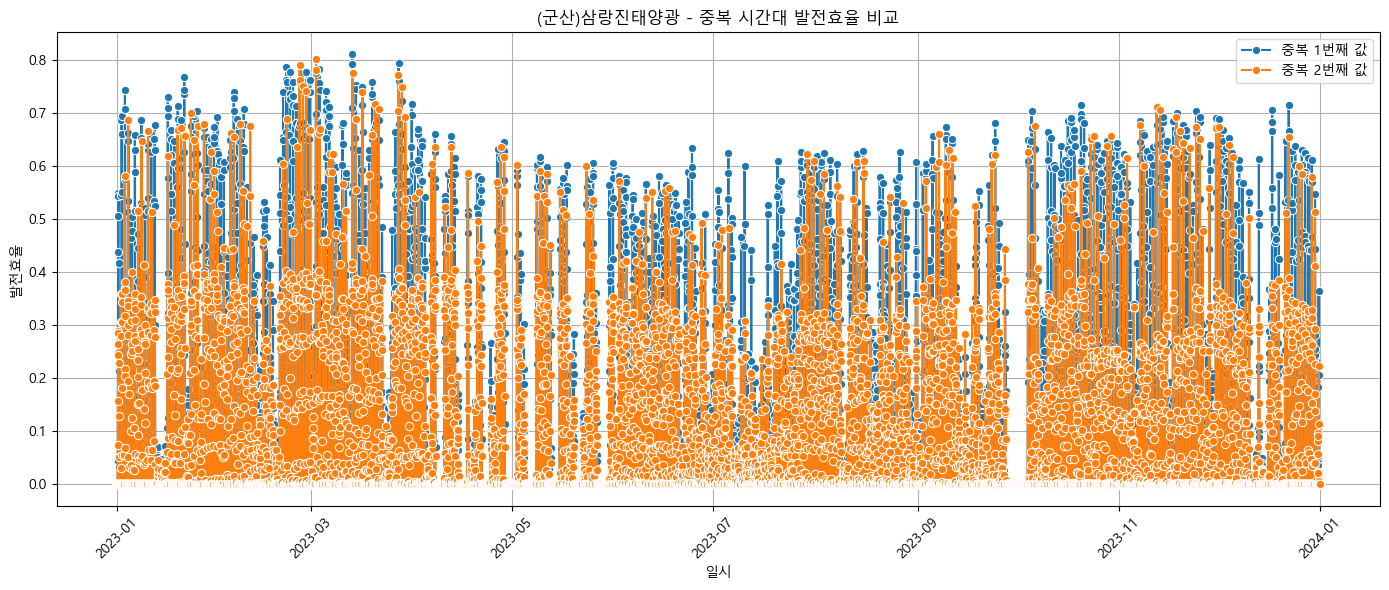

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 삼랑진 필터
samrangjin = df_solar[df_solar['발전구분'] == '(군산)삼랑진태양광'].copy()

# 2. 중복된 (일자, 시간)만 필터링
dupes = samrangjin[samrangjin.duplicated(subset=['일자', '시간'], keep=False)].copy()

# 3. '일시' 만들기
dupes['시간'] = dupes['시간'].astype(int)
dupes['일자'] = pd.to_datetime(dupes['일자'], errors='coerce')
mask_24 = dupes['시간'] == 24
dupes.loc[mask_24, '시간'] = 0
dupes.loc[mask_24, '일자'] += pd.Timedelta(days=1)
dupes['일시'] = pd.to_datetime(dupes['일자'].dt.strftime('%Y-%m-%d') + ' ' + dupes['시간'].astype(str) + ':00:00')

# 4. 효율 계산
dupes['효율'] = dupes['발전량(kWh)'] / dupes['설비용량(MW)'] / 1000

# 5. (일자+시간) 기준 정렬 후, index 기준으로 나누기
dupes = dupes.sort_values(['일시']).reset_index(drop=True)

# 6. 2줄씩 나누기 (짝수 인덱스, 홀수 인덱스)
line1 = dupes.iloc[::2].copy()  # 첫 번째 값
line2 = dupes.iloc[1::2].copy()  # 두 번째 값

# 7. 그래프 그리기 (같은 x축 기준)
plt.figure(figsize=(14, 6))
sns.lineplot(x=line1['일시'], y=line1['효율'], label='중복 1번째 값', marker='o')
sns.lineplot(x=line2['일시'], y=line2['효율'], label='중복 2번째 값', marker='o')
plt.title('(군산)삼랑진태양광 - 중복 시간대 발전효율 비교')
plt.xlabel('일시')
plt.ylabel('발전효율')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


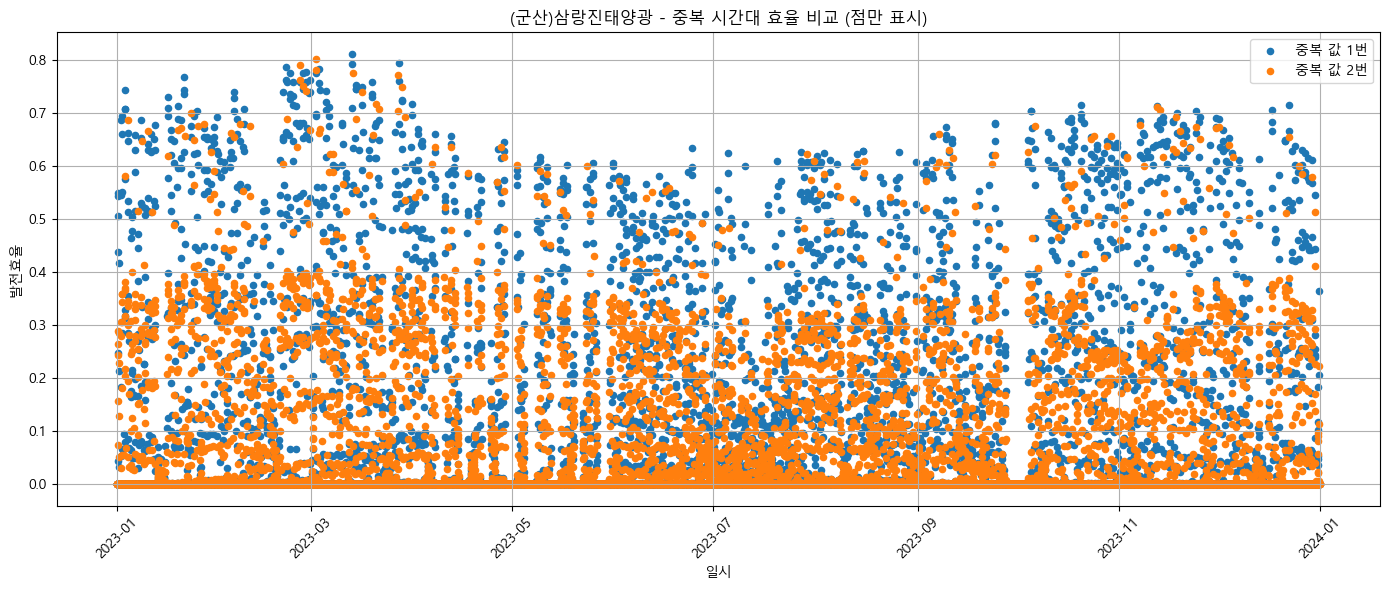

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta

# 1. 삼랑진 중복 데이터 추출
samrangjin = df_solar[df_solar['발전구분'] == '(군산)삼랑진태양광'].copy()
dupes = samrangjin[samrangjin.duplicated(subset=['일자', '시간'], keep=False)].copy()

# 2. 일시 생성
dupes['시간'] = dupes['시간'].astype(int)
dupes['일자'] = pd.to_datetime(dupes['일자'], errors='coerce')
dupes.loc[dupes['시간'] == 24, '시간'] = 0
dupes.loc[dupes['시간'] == 0, '일자'] += pd.Timedelta(days=1)
dupes['일시'] = pd.to_datetime(dupes['일자'].dt.strftime('%Y-%m-%d') + ' ' + dupes['시간'].astype(str) + ':00:00')

# 3. 효율 계산
dupes['효율'] = dupes['발전량(kWh)'] / dupes['설비용량(MW)'] / 1000

# 4. 정렬 후 짝수/홀수로 분리
dupes_sorted = dupes.sort_values('일시').reset_index(drop=True)
line1 = dupes_sorted.iloc[::2].copy().reset_index(drop=True)
line2 = dupes_sorted.iloc[1::2].copy().reset_index(drop=True)

# ✅ 5. 시간 살짝 비틀어서 겹치지 않게
line1['일시'] = line1['일시'] - timedelta(minutes=15)
line2['일시'] = line2['일시'] + timedelta(minutes=15)

# ✅ 6. 점만 찍는 그래프 (꺾은선 없음)
plt.figure(figsize=(14, 6))
plt.scatter(line1['일시'], line1['효율'], label='중복 값 1번', s=20)
plt.scatter(line2['일시'], line2['효율'], label='중복 값 2번', s=20)
plt.title('(군산)삼랑진태양광 - 중복 시간대 효율 비교 (점만 표시)')
plt.xlabel('일시')
plt.ylabel('발전효율')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [47]:
# 1. 삼랑진 필터
samrangjin = df_solar[df_solar['발전구분'] == '(군산)삼랑진태양광'].copy()

# 2. 중복된 (일자, 시간)만 추출
dupes = samrangjin[samrangjin.duplicated(subset=['일자', '시간'], keep=False)].copy()

# 3. 정렬 및 일시 생성
dupes['시간'] = dupes['시간'].astype(int)
dupes['일자'] = pd.to_datetime(dupes['일자'], errors='coerce')
dupes.loc[dupes['시간'] == 24, '시간'] = 0
dupes.loc[dupes['시간'] == 0, '일자'] += pd.Timedelta(days=1)
dupes['일시'] = pd.to_datetime(dupes['일자'].dt.strftime('%Y-%m-%d') + ' ' + dupes['시간'].astype(str) + ':00:00')

# 4. 효율 계산
dupes['효율'] = dupes['발전량(kWh)'] / dupes['설비용량(MW)'] / 1000

# 5. 정렬 후 그룹핑
dupes_sorted = dupes.sort_values(['일자', '시간']).reset_index(drop=True)
grouped = dupes_sorted.groupby(['일자', '시간'])

# 6. 두 개의 값을 나란히 정리 (only 그룹 길이 2인 경우만)
records = []
for (day, hour), group in grouped:
    if len(group) == 2:
        g = group.reset_index(drop=True)
        record = {
            '일자': day.strftime('%Y-%m-%d'),
            '시간': hour,
            '발전량1': g.loc[0, '발전량(kWh)'],
            '발전량2': g.loc[1, '발전량(kWh)'],
            '효율1': g.loc[0, '효율'],
            '효율2': g.loc[1, '효율'],
        }
        records.append(record)

# 7. DataFrame으로 만들기
df_dupe_comp = pd.DataFrame(records)

# 8. 출력
df_dupe_comp.head(80)


,일자,시간,발전량1,발전량2,효율1,효율2
0,2023-01-01,1,0.0,0.000,0.0,0.000000
1,2023-01-01,2,0.0,0.000,0.0,0.000000
2,2023-01-01,3,0.0,0.000,0.0,0.000000
3,2023-01-01,4,0.0,0.000,0.0,0.000000
4,2023-01-01,5,0.0,0.000,0.0,0.000000
...,...,...,...,...,...,...
75,2023-01-04,4,0.0,0.000,0.0,0.000000
76,2023-01-04,5,0.0,0.000,0.0,0.000000
77,2023-01-04,6,0.0,0.000,0.0,0.000000
78,2023-01-04,7,0.0,0.000,0.0,0.000000


In [61]:
df_dupe_comp.head(80)

,일자,시간,발전량1,발전량2,효율1,효율2,월
0,2023-01-01,0,0.00,0.000,0.00000,0.000000,1
1,2023-01-01,0,1098.18,577.728,0.54909,0.288864,1
2,2023-01-01,0,0.00,0.000,0.00000,0.000000,1
3,2023-01-01,0,0.00,0.000,0.00000,0.000000,1
4,2023-01-01,0,0.00,0.000,0.00000,0.000000,1
...,...,...,...,...,...,...,...
75,2023-01-04,0,0.00,0.000,0.00000,0.000000,1
76,2023-01-04,0,1067.76,601.728,0.53388,0.300864,1
77,2023-01-04,0,0.00,0.000,0.00000,0.000000,1
78,2023-01-04,0,0.00,0.000,0.00000,0.000000,1


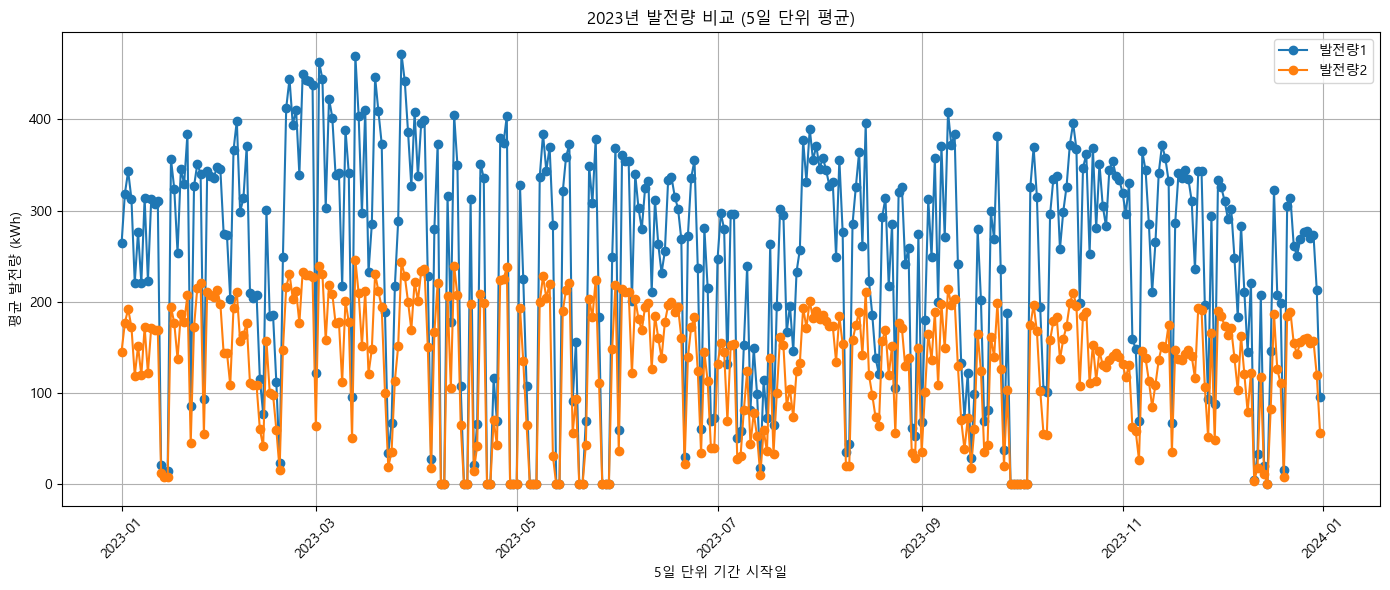

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 일자 datetime 변환 + 2023년 데이터 필터링
df_dupe_comp['일자'] = pd.to_datetime(df_dupe_comp['일자'])
df_2023 = df_dupe_comp[df_dupe_comp['일자'].dt.year == 2023].copy()

# 2. '5일 단위 그룹' 만들기
df_2023['5일단위'] = df_2023['일자'].dt.to_period('5D').dt.start_time

# 3. 5일 단위 평균 계산
grouped = df_2023.groupby('5일단위').agg({
    '발전량1': 'mean',
    '발전량2': 'mean'
}).reset_index()

# 4. 하나의 꺾은선 그래프 그리기
plt.figure(figsize=(14, 6))
plt.plot(grouped['5일단위'], grouped['발전량1'], marker='o', label='발전량1')
plt.plot(grouped['5일단위'], grouped['발전량2'], marker='o', label='발전량2')
plt.title('2023년 발전량 비교 (5일 단위 평균)')
plt.xlabel('5일 단위 기간 시작일')
plt.ylabel('평균 발전량 (kWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('solar_seperation_reasoning.png', dpi=300)
plt.show()


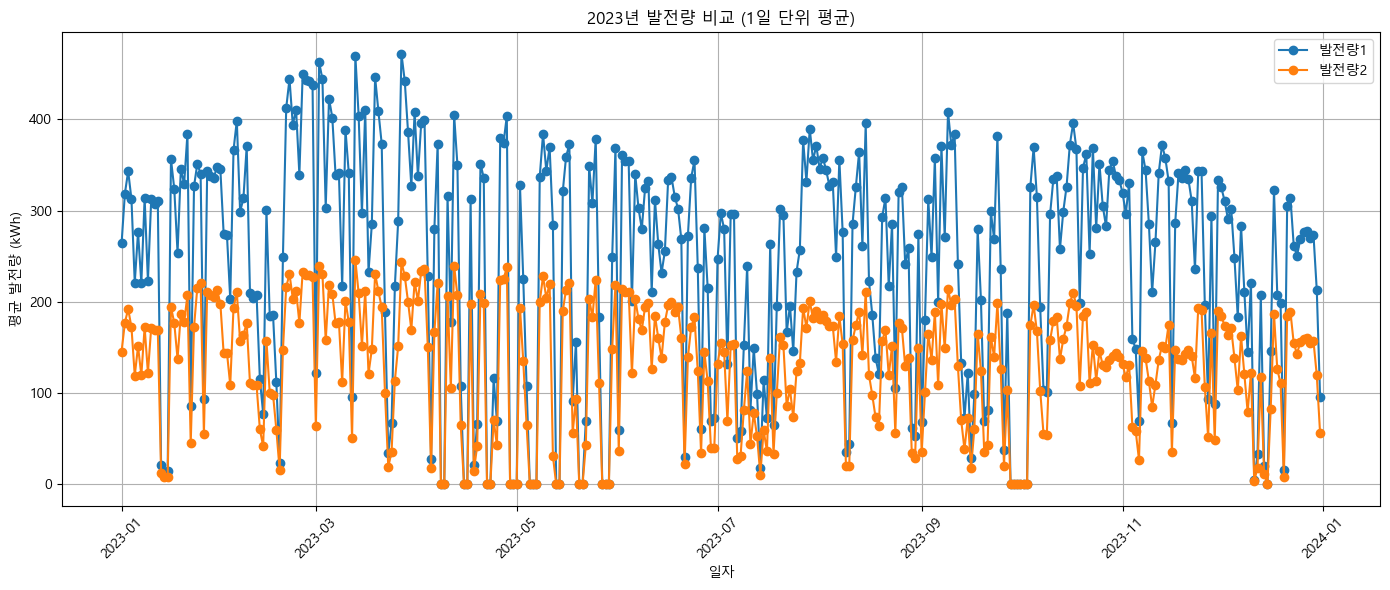

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 일자 datetime 변환 + 2023년 데이터 필터링
df_dupe_comp['일자'] = pd.to_datetime(df_dupe_comp['일자'])
df_2023 = df_dupe_comp[df_dupe_comp['일자'].dt.year == 2023].copy()

# 2. '1일 단위 그룹' 만들기
df_2023['1일단위'] = df_2023['일자'].dt.date  # 또는 dt.floor('D')도 가능

# 3. 1일 단위 평균 계산
grouped = df_2023.groupby('1일단위').agg({
    '발전량1': 'mean',
    '발전량2': 'mean'
}).reset_index()

# 4. 꺾은선 그래프 그리기
plt.figure(figsize=(14, 6))
plt.plot(grouped['1일단위'], grouped['발전량1'], marker='o', label='발전량1')
plt.plot(grouped['1일단위'], grouped['발전량2'], marker='o', label='발전량2')
plt.title('2023년 발전량 비교 (1일 단위 평균)')
plt.xlabel('일자')
plt.ylabel('평균 발전량 (kWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [56]:
# 2023년 데이터 필터링
df_2023 = df_dupe_comp[df_dupe_comp['일자'].dt.year == 2023]

# 발전량1과 발전량2 총합 계산
total_energy_1 = df_2023['발전량1'].sum()
total_energy_2 = df_2023['발전량2'].sum()

print(f"발전량1 총합: {total_energy_1:.2f} kWh")
print(f"발전량2 총합: {total_energy_2:.2f} kWh")


발전량1 총합: 2135341.80 kWh
발전량2 총합: 1145480.06 kWh


In [59]:
# 발전량1이 더 큰 경우 개수
count_1_greater = (grouped['발전량1'] > grouped['발전량2']).sum()

# 발전량2가 더 큰 경우 개수
count_2_greater = (grouped['발전량2'] > grouped['발전량1']).sum()

# 결과 출력
print(f"발전량1이 더 큰 날의 수: {count_1_greater}")
print(f"발전량2가 더 큰 날의 수: {count_2_greater}")

# 발전량2가 더 큰 경우의 데이터 출력
발전량2_우위 = grouped[grouped['발전량2'] > grouped['발전량1']]
print("\n발전량2가 더 큰 날의 발전량:")
print(발전량2_우위[['1일단위', '발전량1', '발전량2']])


발전량1이 더 큰 날의 수: 340
발전량2가 더 큰 날의 수: 0

발전량2가 더 큰 날의 발전량:
Empty DataFrame
Columns: [1일단위, 발전량1, 발전량2]
Index: []


In [60]:
import pandas as pd

# 1. 일자 datetime 변환 및 2023년 필터링
df_dupe_comp['일자'] = pd.to_datetime(df_dupe_comp['일자'])
df_2023 = df_dupe_comp[df_dupe_comp['일자'].dt.year == 2023].copy()

# 2. 조건별 개수 계산
count_1_greater = (df_2023['발전량1'] > df_2023['발전량2']).sum()
count_2_greater = (df_2023['발전량2'] > df_2023['발전량1']).sum()
count_equal      = (df_2023['발전량1'] == df_2023['발전량2']).sum()

# 3. 출력
print(f"발전량1이 더 큰 시간 수: {count_1_greater}")
print(f"발전량2가 더 큰 시간 수: {count_2_greater}")
print(f"발전량이 같은 시간 수: {count_equal}")

# 4. 발전량2가 더 큰 행 출력
발전량2_우위 = df_2023[df_2023['발전량2'] > df_2023['발전량1']]
print("\n발전량2가 더 큰 시간의 일시 및 발전량:")
print(발전량2_우위[['일자', '발전량1', '발전량2']])


발전량1이 더 큰 시간 수: 3699
발전량2가 더 큰 시간 수: 360
발전량이 같은 시간 수: 4700

발전량2가 더 큰 시간의 일시 및 발전량:
             일자  발전량1   발전량2
22   2023-01-01  0.18  0.672
41   2023-01-02  0.00  0.480
64   2023-01-03  0.00  0.288
73   2023-01-04  0.00  0.384
94   2023-01-04  0.00  0.864
...         ...   ...    ...
8646 2023-12-27  0.00  0.096
8674 2023-12-28  0.00  0.480
8689 2023-12-29  0.00  0.768
8712 2023-12-30  0.00  0.096
8735 2023-12-31  0.00  0.192

[360 rows x 3 columns]


In [62]:
import pandas as pd

# 모든 행 출력 설정
pd.set_option('display.max_rows', None)

# 발전량2가 더 큰 행만 필터링
발전량2_우위 = df_2023[df_2023['발전량2'] > df_2023['발전량1']]

# 원하는 열만 출력
print("\n발전량2가 더 큰 시간의 일시 및 발전량:")
print(발전량2_우위[['일자', '발전량1', '발전량2']])

# 이후 다시 기본 출력으로 복원하고 싶으면 아래 코드 사용
# pd.reset_option('display.max_rows')



발전량2가 더 큰 시간의 일시 및 발전량:
             일자    발전량1     발전량2
22   2023-01-01    0.18    0.672
41   2023-01-02    0.00    0.480
64   2023-01-03    0.00    0.288
73   2023-01-04    0.00    0.384
94   2023-01-04    0.00    0.864
96   2023-01-05    0.90    0.960
118  2023-01-05    0.18    0.480
137  2023-01-06    0.72    1.152
144  2023-01-07    0.72    0.864
160  2023-01-07    1.08    1.632
175  2023-01-08    0.00    0.096
181  2023-01-08    1.08    2.016
202  2023-01-09    0.90    0.960
211  2023-01-09    1.80    2.016
219  2023-01-10    0.00    0.288
238  2023-01-10    0.18    0.672
241  2023-01-11    0.00    0.576
258  2023-01-11    0.36    2.016
264  2023-01-12    0.18    0.480
282  2023-01-12    1.26    1.440
296  2023-01-13    4.14    4.416
304  2023-01-13    1.08    1.248
330  2023-01-14    1.80    2.304
354  2023-01-15    5.58    6.432
355  2023-01-15    1.98    2.784
360  2023-01-16    0.54    0.672
382  2023-01-16    3.78    6.144
390  2023-01-17    1.80    1.920
405  2023-01-17   